### Exercício 01

![alt text](ex1.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Atomo:
    def __init__(self, massa: float):
        self.massa = massa

class CadeiaAtomica:
    def __init__(self, N: int, tipo: str = 'homogenea', k: float = 1.0):
        self.N = N
        self.k = k
        self.tipo = tipo.lower()
        self.atom_list = self._criar_cadeia()
        self.massas = [atomo.massa for atomo in self.atom_list]

    def _criar_cadeia(self):
        atomos = []
        m = 1.0
        if self.tipo == 'homogenea':
            for _ in range(self.N):
                atomos.append(Atomo(m))
        elif self.tipo == 'ternaria':
            pattern = [m, 3*m, 5*m]
            for i in range(self.N):
                atomos.append(Atomo(pattern[i % 3]))
        else:
            raise ValueError("Tipo de cadeia inválido. Use 'homogenea' ou 'ternaria'.")
        return atomos

    def montar_matrizes(self):
        M = np.diag(self.massas)
        K = np.zeros((self.N, self.N))
        for i in range(self.N):
            K[i, i] += 2 * self.k
            K[i, (i - 1) % self.N] -= self.k
            K[i, (i + 1) % self.N] -= self.k
        return M, K

    def calcular_frequencias_e_modos(self):
        M, K = self.montar_matrizes()
        A = np.linalg.inv(M) @ K
        eigvals, eigvecs = np.linalg.eig(A)

        idx = np.argsort(np.real(eigvals))
        eigvals = np.real(eigvals[idx])
        eigvecs = np.real(eigvecs[:, idx])
        freq = np.sqrt(np.abs(eigvals))

        return freq, eigvecs

    def plotar_frequencias(self, freq):
        plt.figure(figsize=(8, 4))
        plt.plot(range(1, len(freq)+1), freq, marker='o')
        plt.title(f"Frequências Naturais - {self.tipo.capitalize()} (N={self.N})")
        plt.xlabel("Modo")
        plt.ylabel("Frequência (rad/s)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plotar_modos_normais(self, modos, freq, n_modos=3):
        plt.figure(figsize=(10, 6))
        for i in range(n_modos):
            desloc = modos[:, i]
            desloc = desloc / np.max(np.abs(desloc))  # Normalizar
            plt.subplot(n_modos, 1, i+1)
            plt.plot(range(self.N), desloc, marker='o')
            plt.title(f"Modo {i+1} - Freq: {freq[i]:.2f} rad/s")
            plt.xlabel("Índice do Átomo")
            plt.ylabel("Deslocamento")
            plt.grid(True)
        plt.tight_layout()
        plt.show()



===== N = 100, Tipo = homogenea =====
Primeiras 5 frequências: [6.32464637e-08 6.28215182e-02 6.28215182e-02 1.25581039e-01
 1.25581039e-01]


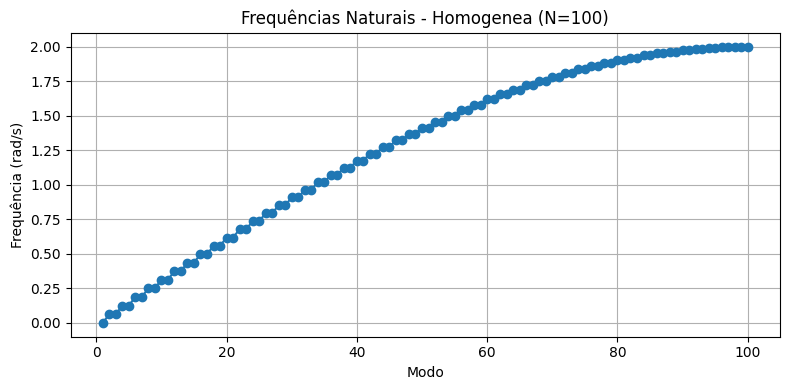

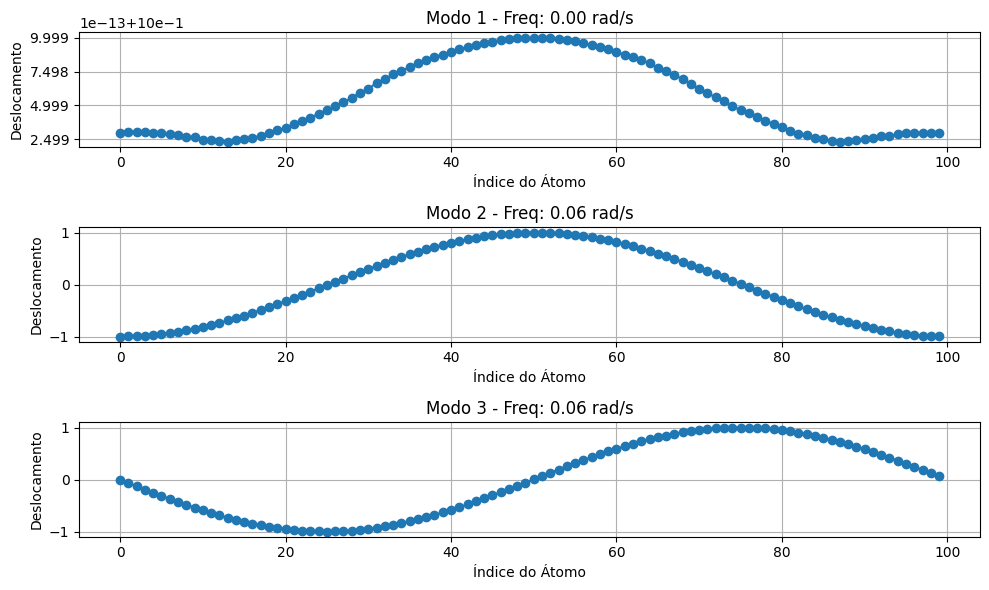


===== N = 100, Tipo = ternaria =====
Primeiras 5 frequências: [5.47868943e-09 3.62625078e-02 3.65063707e-02 7.24437566e-02
 7.29338994e-02]


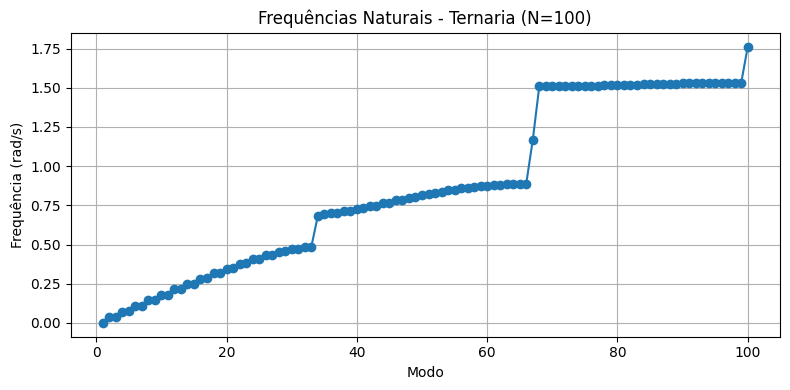

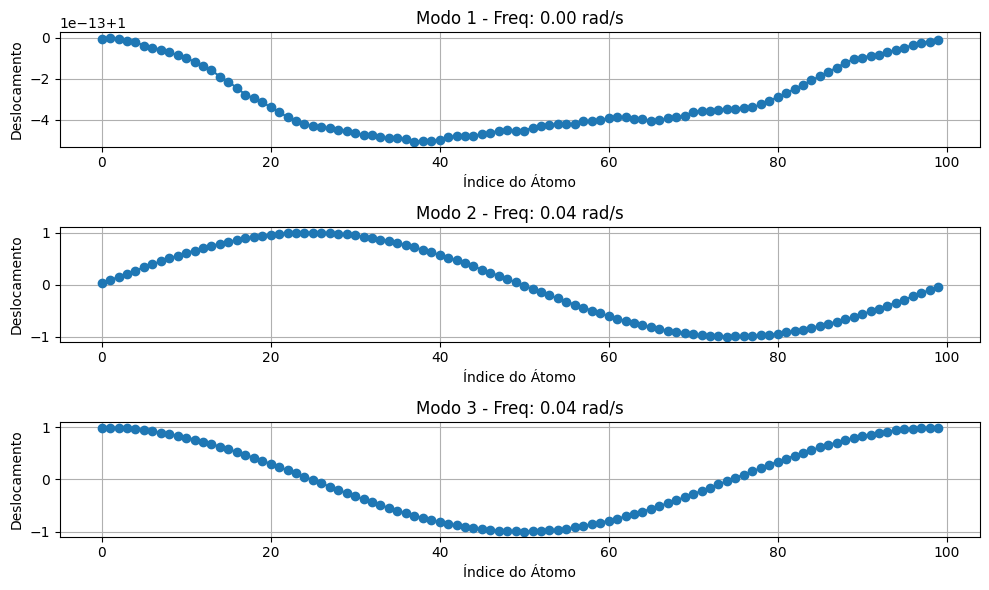


===== N = 1000, Tipo = homogenea =====
Primeiras 5 frequências: [1.31415234e-07 6.28317497e-03 6.28317497e-03 1.25662879e-02
 1.25662879e-02]

===== N = 1000, Tipo = ternaria =====
Primeiras 5 frequências: [4.83929436e-09 3.62758565e-03 3.63000570e-03 7.25509280e-03
 7.25993314e-03]

===== N = 10000, Tipo = homogenea =====


In [ ]:
# Exemplo de uso
from frequencia import CadeiaAtomica


Ns = [100, 1000, 10000]
tipos = ['homogenea', 'ternaria']
k = 1.0

for N in Ns:
    for tipo in tipos:
        print(f"\n===== N = {N}, Tipo = {tipo} =====")
        sistema = CadeiaAtomica(N=N, tipo=tipo, k=k)
        freq, modos = sistema.calcular_frequencias_e_modos()
        print("Primeiras 5 frequências:", freq[:5])

        if N == 100:
            sistema.plotar_frequencias(freq)
            sistema.plotar_modos_normais(modos, freq, n_modos=3)


### Exercício 02
![alt text](ex2.png)

### Exercício 03
![alt text](ex3.png)

### Exercício 04
![alt text](ex4.png)

resposta do moodle:

Introdução

O modelo massa-mola é uma representação simplificada, porém eficaz, das interações atômicas em sólidos, onde massas simulam átomos e molas representam forças de ligação entre eles. Esse modelo permite estudar a propagação de vibrações e ondas mecânicas em sistemas discretos.

Cadeias homogêneas, compostas por massas e molas idênticas, refletem materiais com estrutura uniforme. Já cadeias binárias, com alternância de massas e/ou molas, simulam materiais compostos e revelam fenômenos como bandas proibidas na propagação de ondas.

As condições de contorno livres, onde as extremidades da cadeia não estão fixas, são importantes para representar sistemas físicos reais, como superfícies de cristais ou nanoestruturas. Elas influenciam diretamente os modos normais de vibração e permitem uma análise mais realista do comportamento dinâmico do sistema.